In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import date

Data Ingestion

In [3]:
df_car = pd.read_csv(r'D:\AWS\usedcar\car_data.csv')
df_mod=pd.read_csv(r'D:\AWS\usedcar\model_data.csv')

Top 5 rows for data set 

In [10]:
df_car.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [4]:
df_mod.head()

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


join both tables on model colmuns

In [5]:
df = pd.merge(df_car, df_mod, left_on='Model', right_on='Model')

Using describe to check all the possible values 

In [6]:
df.describe(include='all')

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
count,2237,2.237000e+03,2237.000000,2237.000000,2237,2237,2237,2223,2237.000000,2235
unique,434,NaN,NaN,NaN,3,4,58,473,NaN,325
top,MarutiSwift,NaN,NaN,NaN,First Owner,Petrol,MANUAL,Expired,NaN,Rs.5.49 Lakh
freq,118,NaN,NaN,NaN,1707,1384,1909,248,NaN,131
mean,NaN,4.184431e+05,61928.605275,2013.763523,NaN,NaN,NaN,NaN,4.370854,NaN
std,NaN,2.280516e+05,42260.955917,2.874686,NaN,NaN,NaN,NaN,0.288990,NaN
min,NaN,7.529900e+04,913.000000,2006.000000,NaN,NaN,NaN,NaN,3.000000,NaN
25%,NaN,2.720990e+05,32137.000000,2012.000000,NaN,NaN,NaN,NaN,4.200000,NaN
50%,NaN,3.557990e+05,55430.000000,2014.000000,NaN,NaN,NaN,NaN,4.300000,NaN
75%,NaN,5.032990e+05,83427.000000,2016.000000,NaN,NaN,NaN,NaN,4.600000,NaN


To check if there are any missing value in all colums

In [13]:
df.isna().mean()*100

Model                0.000000
Selling Price        0.000000
Kilometers Driven    0.000000
Year                 0.000000
Owner                0.000000
Fuel Type            0.000000
Transmission         0.000000
Insurance            0.625838
Car Condition        0.000000
Current Price        0.089405
dtype: float64

Plotting histogram to observe the price of cars sold 

In [14]:
fig = px.histogram(df, 'Selling Price')
fig.show()


In [15]:
df = df[df['Selling Price'] != 0]

The Function to change the format of selling prices 
Converts str to total numeric values 

In [16]:
def format_price(price):
    price = str(price)
    price = price.replace('Rs.', '')
    price = price.replace(',', '')
    num_zeros = 5
    if '.' not in price and ' Lakh' in price:
        price = price.replace(' Lakh', '0'*num_zeros)
    elif '.' in price and ' Lakh in price':
        n = len(price)
        m = price.index('.')
        num_zeros = n - m - num_zeros
        price = price.replace(' Lakh', '0'*num_zeros)
        price = price.replace('.', '')
    return price

This to change the format for current price of the cars 

In [17]:
df['Current Price'] = df['Current Price'].apply(format_price)
df[df['Current Price'] == 'nan'] = 0
df['Current Price'] = df['Current Price'].astype(int)

plotting histogram of current price 

In [18]:
fig = px.histogram(df, 'Current Price')
fig.show()

Here below to find the how old the car is from the manufacturing year 

In [19]:
year = date.today().year
df['Age'] = year - df['Year']

Scatter plot showing the Age of  and kilometer driven .

In [20]:
df = df[df['Selling Price'] != 0]
fig = px.scatter(x=df['Age'], y=df['Kilometers Driven'])
fig.show()

Scatter plot between Kilometers driven and selling price 

In [21]:
fig = px.scatter(x=df['Kilometers Driven'], y=df['Selling Price'])
fig.show()

scatter plot for age and selling price of the cars

In [1]:
fig = px.scatter(x=df['Age'], y=df['Selling Price'])
fig.show()

NameError: name 'px' is not defined

In [23]:
df['No_Current_Price'] = 0
df.loc[df['Current Price'] == 0, 'No_Current_Price'] = 1

In [24]:
df['diff'] = df['Current Price'] - df['Selling Price']

to find the differnce between current price and selling price 

In [25]:
med_diff = df[df['diff'] > 0]['diff'].median()

In [26]:
def set_current_price(row):
    if row['Current Price'] == 0 or row['diff'] < 0:
        row['Current Price'] = row['Selling Price'] + med_diff
    
    return row['Current Price']

df.loc[:, 'Current Price'] = df.apply(set_current_price, axis=1)

In [27]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Age,No_Current_Price,diff
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2,465000,9,0,152835
1,MarutiWagonR1.0LXI,242499,88514,2015,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,465000,8,0,222501
2,MarutiWagonR1.0LXI,381699,29735,2017,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,465000,6,0,83301
3,MarutiWagonR1.0LXI,181999,153709,2013,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,465000,10,0,283001
4,MarutiWagonR1.0LXI,239499,88691,2012,Second Owner,Petrol + CNG,MANUAL,15-10-2021,4.4,465000,11,0,225501


In [22]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Age,No_Current_Price,diff
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2,465000,9,0,152835
1,MarutiWagonR1.0LXI,242499,88514,2015,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,465000,8,0,222501
2,MarutiWagonR1.0LXI,381699,29735,2017,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,465000,6,0,83301
3,MarutiWagonR1.0LXI,181999,153709,2013,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,465000,10,0,283001
4,MarutiWagonR1.0LXI,239499,88691,2012,Second Owner,Petrol + CNG,MANUAL,15-10-2021,4.4,465000,11,0,225501


dropping the unsed columns

In [28]:
df.drop([ 'Year', 'Insurance', 'diff'], axis=1, inplace=True)
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,Current Price,Age,No_Current_Price
0,MarutiWagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,4.2,465000,9,0
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,Petrol + CNG,MANUAL,4.4,465000,8,0
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,Petrol + CNG,MANUAL,4.3,465000,6,0
3,MarutiWagonR1.0LXI,181999,153709,First Owner,Petrol + CNG,MANUAL,4.1,465000,10,0
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,Petrol + CNG,MANUAL,4.4,465000,11,0


In [29]:
X = df.drop(['Selling Price'], axis=1)
y = df.loc[:, 'Selling Price']







Relation between selling price and current price

In [30]:
df[["Current Price", "Selling Price"]].corr()

,Current Price,Selling Price
Current Price,1.000000,0.537003
Selling Price,0.537003,1.000000


In [31]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 

Grahp for kilometer driven and selling price we can the are driectly proportional 

(0.0, 2078271.3644454658)

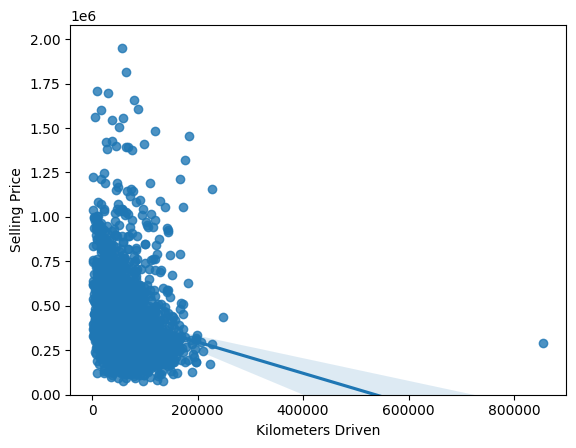

In [32]:
from matplotlib import pyplot


sns.regplot(x="Kilometers Driven", y="Selling Price", data=df)
pyplot.ylim(0,)

Boxplot for transmission and selling price 

<Axes: xlabel='Transmission', ylabel='Selling Price'>

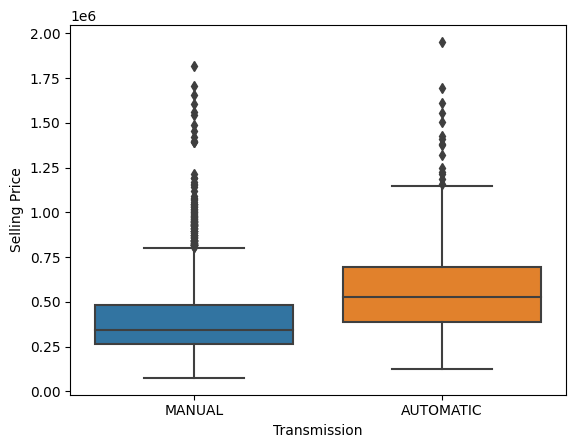

In [37]:
sns.boxplot(x="Transmission", y="Selling Price", data=df)#b

Plotting boxplot to see what is the price of diferent fule type

<Axes: xlabel='Fuel Type', ylabel='Selling Price'>

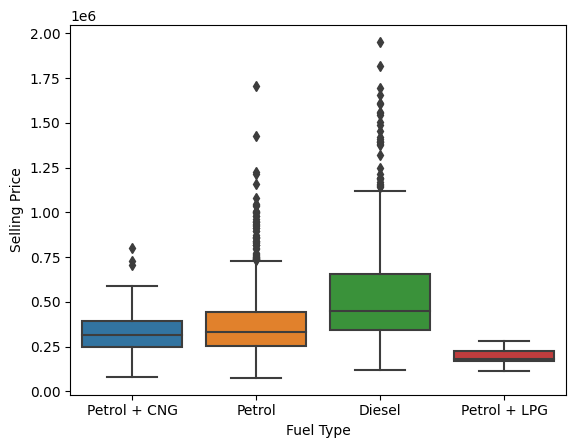

In [34]:
sns.boxplot(x="Fuel Type", y="Selling Price", data=df)#b

In [35]:
df['Transmission']. unique()

array(['MANUAL', 'MH12', 'TS07', 'KA01', 'MH05', 'DL5C', 'DL9C', 'MH04',
       'TS08', 'AUTOMATIC', 'UP14', 'UP32', 'HR03', 'MH01', 'DL2C',
       'KA05', 'KA50', 'KA53', 'DL12', 'DL11', 'GJ27', 'TN12', 'TN02',
       'HR26', 'MH03', 'MH47', 'TS09', 'RJ14', 'TN06', 'MH43', 'DL4C',
       'KA02', 'MH02', 'RJ45', 'DL3C', 'TN22', 'KA04', 'MH46', 'KA51',
       'PB91', 'DL8C', 'GJ18', 'HR51', 'DL10', 'HR29', 'KA03', 'DL14',
       'GJ05', 'GJ01', 'PB10', 'MH14', 'UP78', 'GJ06', 'Ch01', 'HR05',
       'HR12', 'DL1C', 'PB11'], dtype=object)

In [36]:
def clean_transmission(trans):
    
    
    if 'MANUAL' != trans and 'AUTOMATIC' != trans:
        trans = "MANUAL"
    
    return trans

df['Transmission'] = df['Transmission'].apply(clean_transmission)

In [32]:
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,Current Price,Age,No_Current_Price
0,MarutiWagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,4.2,465000,9,0
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,Petrol + CNG,MANUAL,4.4,465000,8,0
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,Petrol + CNG,MANUAL,4.3,465000,6,0
3,MarutiWagonR1.0LXI,181999,153709,First Owner,Petrol + CNG,MANUAL,4.1,465000,10,0
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,Petrol + CNG,MANUAL,4.4,465000,11,0


In [33]:
df['Car Condition']. unique()

array([4.2, 4.4, 4.3, 4.1, 4.5, 3.9, 4.6, 3.7, 4. , 4.7, 4.8, 4.9, 5. ,
       3.5, 3.8, 3.4, 3.6, 3.2, 3. ])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2236
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2235 non-null   object 
 1   Selling Price      2235 non-null   int64  
 2   Kilometers Driven  2235 non-null   int64  
 3   Owner              2235 non-null   object 
 4   Fuel Type          2235 non-null   object 
 5   Transmission       2235 non-null   object 
 6   Car Condition      2235 non-null   float64
 7   Current Price      2235 non-null   int32  
 8   Age                2235 non-null   int64  
 9   No_Current_Price   2235 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 183.3+ KB


Storing the cleaned data 

In [39]:
df.to_csv('cleaned car.csv')

In [40]:
df.reset_index()

,index,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,Current Price,Age,No_Current_Price
0,0,MarutiWagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,4.2,465000,9,0
1,1,MarutiWagonR1.0LXI,242499,88514,Second Owner,Petrol + CNG,MANUAL,4.4,465000,8,0
2,2,MarutiWagonR1.0LXI,381699,29735,Second Owner,Petrol + CNG,MANUAL,4.3,465000,6,0
3,3,MarutiWagonR1.0LXI,181999,153709,First Owner,Petrol + CNG,MANUAL,4.1,465000,10,0
4,4,MarutiWagonR1.0LXI,239499,88691,Second Owner,Petrol + CNG,MANUAL,4.4,465000,11,0
...,...,...,...,...,...,...,...,...,...,...,...
2230,2232,NissanMicraXEPLUS,138199,65120,Second Owner,Petrol,MANUAL,4.3,478000,13,0
2231,2233,ToyotaInnova2.5V,509899,131152,First Owner,Diesel,MANUAL,4.5,1197000,12,0
2232,2234,FordEcosport1.5TRENDTI,1001799,4400,First Owner,Petrol,MANUAL,5.0,1232750,4,0
2233,2235,HyundaiElitei20MagnaExecutive,643499,65667,First Owner,Diesel,MANUAL,4.5,722198,5,0


In [41]:
df.describe()

,Selling Price,Kilometers Driven,Car Condition,Current Price,Age,No_Current_Price
count,2.235000e+03,2235.000000,2235.000000,2.235000e+03,2235.000000,2235.000000
mean,4.183821e+05,61950.293512,4.370872,7.813966e+05,9.235794,0.012528
std,2.281439e+05,42271.114127,0.289022,5.762826e+05,2.875882,0.111250
min,7.529900e+04,913.000000,3.000000,2.850000e+05,3.000000,0.000000
25%,2.720490e+05,32144.500000,4.200000,4.980000e+05,7.000000,0.000000
50%,3.555300e+05,55484.000000,4.300000,5.990000e+05,9.000000,0.000000
75%,5.029490e+05,83429.000000,4.600000,9.000000e+05,11.000000,0.000000
max,1.952397e+06,855881.000000,5.000000,8.639399e+06,17.000000,1.000000


In [42]:
df[df['Selling Price']<6e6]

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,Current Price,Age,No_Current_Price
0,MarutiWagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,4.2,465000,9,0
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,Petrol + CNG,MANUAL,4.4,465000,8,0
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,Petrol + CNG,MANUAL,4.3,465000,6,0
3,MarutiWagonR1.0LXI,181999,153709,First Owner,Petrol + CNG,MANUAL,4.1,465000,10,0
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,Petrol + CNG,MANUAL,4.4,465000,11,0
...,...,...,...,...,...,...,...,...,...,...
2232,NissanMicraXEPLUS,138199,65120,Second Owner,Petrol,MANUAL,4.3,478000,13,0
2233,ToyotaInnova2.5V,509899,131152,First Owner,Diesel,MANUAL,4.5,1197000,12,0
2234,FordEcosport1.5TRENDTI,1001799,4400,First Owner,Petrol,MANUAL,5.0,1232750,4,0
2235,HyundaiElitei20MagnaExecutive,643499,65667,First Owner,Diesel,MANUAL,4.5,722198,5,0


Data Modeling

In [43]:
X = df.drop(['Selling Price','Age','No_Current_Price','Current Price','Car Condition'], axis=1)
y = df.loc[:, 'Selling Price']


In [44]:
X

,Model,Kilometers Driven,Owner,Fuel Type,Transmission
0,MarutiWagonR1.0LXI,82238,First Owner,Petrol + CNG,MANUAL
1,MarutiWagonR1.0LXI,88514,Second Owner,Petrol + CNG,MANUAL
2,MarutiWagonR1.0LXI,29735,Second Owner,Petrol + CNG,MANUAL
3,MarutiWagonR1.0LXI,153709,First Owner,Petrol + CNG,MANUAL
4,MarutiWagonR1.0LXI,88691,Second Owner,Petrol + CNG,MANUAL
...,...,...,...,...,...
2232,NissanMicraXEPLUS,65120,Second Owner,Petrol,MANUAL
2233,ToyotaInnova2.5V,131152,First Owner,Diesel,MANUAL
2234,FordEcosport1.5TRENDTI,4400,First Owner,Petrol,MANUAL
2235,HyundaiElitei20MagnaExecutive,65667,First Owner,Diesel,MANUAL


In [45]:
y

0        312165
1        242499
2        381699
3        181999
4        239499
         ...   
2232     138199
2233     509899
2234    1001799
2235     643499
2236     212299
Name: Selling Price, Length: 2235, dtype: int64

Building the Predictive Models
We have use Liner Regression

At first we have to split our data into a training set and a test set, on which the models can be evaluated on later.

In [46]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [49]:
ohe.categories_

[array(['AudiA62.0', 'AudiA62.0TDIPREMIUM', 'AudiQ335TDI', 'BMW3Series',
        'BMW3Series320D', 'BMW5Series', 'BMWX1SDRIVE', 'ChevroletBeatPS',
        'ChevroletCruzeLTZ', 'ChevroletSparkLS', 'DatsunGo',
        'DatsunGoREMIX', 'DatsunRediGo', 'DatsunRediGoT',
        'FiatGrandPuntoACTIVE', 'FiatGrandPuntoDYNAMIC', 'FordEcosport',
        'FordEcosport1.0ECOBOOST', 'FordEcosport1.5AMBIENTE',
        'FordEcosport1.5TDCITITANIUM', 'FordEcosport1.5TITANIUM',
        'FordEcosport1.5TITANIUMPLUSTIVCT', 'FordEcosport1.5TITANIUMTDCI',
        'FordEcosport1.5TITANIUMTI', 'FordEcosport1.5TITANIUMTIVCT',
        'FordEcosport1.5TREND', 'FordEcosport1.5TRENDTI',
        'FordFiestaTREND', 'FordFigo1.2EXI', 'FordFigo1.2TITANIUM',
        'FordFigo1.2ZXI', 'FordFigo1.4EXI', 'FordFigoAspire1.2AMBIENTE',
        'FordFigoAspire1.5TITANIUM', 'FordFigoAspire1.5TREND',
        'FordNewFigo1.5TITANIUMAT', 'HondaAccord2.4ATI',
        'HondaAmaze1.2EMTI', 'HondaAmaze1.2EXMTI', 'HondaAmaze1.2SATI'

In [48]:
ohe=OneHotEncoder()
ohe.fit(X[['Model','Kilometers Driven','Fuel Type','Owner','Transmission']])


OneHotEncoder()

In [ ]:
OneHotEncoder()

OneHotEncoder()

In [50]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Model','Kilometers Driven','Fuel Type','Owner','Transmission'])
                                      ,remainder="passthrough")

In [51]:
lr=LinearRegression()

Then we create our pipeline object,

In [52]:
pipe =make_pipeline(column_trans,lr)

In [53]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AudiA62.0', 'AudiA62.0TDIPREMIUM', 'AudiQ335TDI', 'BMW3Series',
       'BMW3Series320D', 'BMW5Series', 'BMWX1SDRIVE', 'ChevroletBeatPS',
       'ChevroletCruzeLTZ', 'ChevroletSparkLS', 'DatsunGo',
       'DatsunGoREMIX', 'DatsunRediGo', 'Da...
       'VolkswagenVentoTRENDLINE'], dtype=object),
                                                                            array([   913,   1424,   1475, ..., 227458, 247836, 855881], dtype=int64),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'], dtype=object),
                                                                            array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object),
                                                                            array(['AUTOMATIC', 'MANUAL'], dtype=object)]),
                                                  ['Model', 'Kilometers Driven',
                                                   'Fuel Type', 'Owner',
                                                   'Transmission'])])),
                ('linearregression', LinearRegression())])

We now can evaluate our model on our hold out test set using the accuracy metric.

In [54]:
y_pred=pipe.predict(X_test)

y_pred

array([ 359909.95266737,  591084.68666245,  424227.41417639,
        675033.99306097,  511168.21223866,  995292.46985254,
        274529.51691724,  464763.49918408,  740328.7030248 ,
        407292.01433729,  213841.31258308,  402079.06707394,
        328992.92578736,  540591.47720443,  213841.31258308,
        626049.39599974,  464763.49918408,  173305.22757539,
        675303.20448796,  599831.21196482,  346485.07955619,
        389927.98182602,  503751.85657613,  623967.41002409,
        224309.48864062,  426420.09755444,  313115.83616079,
        533322.60891585,  541791.69992019,  273372.80713462,
        295415.68047844,  295415.68047844,  269219.60484784,
        436722.83135346,  673496.57183837,  435127.10812918,
        276193.6126545 ,  288456.84077968,  401661.47259829,
        213841.31258308,  436722.83135346,  573858.69392353,
        402079.06707394,  315152.22615805,  232836.72212694,
        259674.21783317,  503751.85657613,  543790.82710303,
        315152.22615805,

In [55]:
r2_score(y_test,y_pred)

0.6171218788729498

Finally test the trained model , By passing new records

In [56]:
pipe.predict(pd.DataFrame([['MarutiWagonR1.0LXI',82238,'Petrol','First Owner','MANUAL']],columns=['Model','Kilometers Driven','Fuel Type','Owner','Transmission']))

array([352688.02054414])

As we can we have successfully got the results .